# Insurance Claimable Or Not!!

In [1]:
# Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score
from sklearn.tree import DecisionTreeClassifier , plot_tree
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import numpy as np


In [2]:
# Load The Data
data=pd.read_csv(r"D:\Insurance Claim Status Project\InsuranceClaims.csv")
data.head()

,subscription_length,vehicle_age,region_code,segment,model,fuel_type,max_torque,max_power,airbags,is_adjustable_steering,...,displacement,cylinder,transmission_type,turning_radius,gross_weight,is_brake_assist,is_central_locking,is_speed_alert,ncap_rating,claim_status
0,9.3,1.2,C8,C2,M4,Diesel,250.0,113.45,6,Yes,...,1493,4,Automatic,5.2,1720,Yes,Yes,Yes,3,0
1,8.2,1.8,C2,C1,M9,Diesel,200.0,97.89,2,Yes,...,1498,4,Manual,4.9,1051,No,Yes,Yes,4,0
2,9.5,0.2,C8,C2,M4,Diesel,250.0,113.45,6,Yes,...,1493,4,Automatic,5.2,1720,Yes,Yes,Yes,3,0
3,5.2,0.4,C10,A,M1,CNG,60.0,40.36,2,No,...,796,3,Manual,4.6,1185,No,No,Yes,0,0
4,10.1,1.0,C13,B2,M5,Diesel,200.0,88.77,2,Yes,...,1497,4,Manual,5.0,1490,No,Yes,Yes,5,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   subscription_length     58592 non-null  float64
 1   vehicle_age             58592 non-null  float64
 2   region_code             58592 non-null  object 
 3   segment                 58592 non-null  object 
 4   model                   58592 non-null  object 
 5   fuel_type               58592 non-null  object 
 6   max_torque              58592 non-null  float64
 7   max_power               58592 non-null  float64
 8   airbags                 58592 non-null  int64  
 9   is_adjustable_steering  58592 non-null  object 
 10  is_tpms                 58592 non-null  object 
 11  is_parking_sensors      58592 non-null  object 
 12  is_parking_camera       58592 non-null  object 
 13  rear_brakes_type        58592 non-null  object 
 14  displacement            58592 non-null

In [4]:
# Removing Inconsistent data, Duplicates and Null Values
data=data.drop_duplicates()
print(data.isnull().sum())

subscription_length       0
vehicle_age               0
region_code               0
segment                   0
model                     0
fuel_type                 0
max_torque                0
max_power                 0
airbags                   0
is_adjustable_steering    0
is_tpms                   0
is_parking_sensors        0
is_parking_camera         0
rear_brakes_type          0
displacement              0
cylinder                  0
transmission_type         0
turning_radius            0
gross_weight              0
is_brake_assist           0
is_central_locking        0
is_speed_alert            0
ncap_rating               0
claim_status              0
dtype: int64


In [5]:
# Identifying Categorical Columns
categorical_col=data.select_dtypes(include=['object']).columns
categorical_col

Index(['region_code', 'segment', 'model', 'fuel_type',
       'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'rear_brakes_type', 'transmission_type',
       'is_brake_assist', 'is_central_locking', 'is_speed_alert'],
      dtype='object')

In [6]:
data = data[data['segment'] != 'Utility']

In [7]:
numerical_columns=data.select_dtypes(include=['float64','int64']).columns
for col in numerical_columns:
    print(f' {col} :  {data[col].min()} , {data[col].max()},{round(data[col].mean(),2)}')

 subscription_length :  0.0 , 14.0,6.3
 vehicle_age :  0.0 , 20.0,1.52
 max_torque :  60.0 , 250.0,139.11
 max_power :  40.36 , 118.36,81.55
 airbags :  2 , 6,3.21
 displacement :  796 , 1498,1185.65
 cylinder :  3 , 4,3.65
 turning_radius :  4.6 , 5.2,4.88
 gross_weight :  1051 , 1720,1387.22
 ncap_rating :  0 , 5,1.95
 claim_status :  0 , 1,0.09


In [8]:
for col in categorical_col:
    print(col)
    print(list(data[col].unique()))

region_code
['C8', 'C2', 'C10', 'C13', 'C7', 'C5', 'C3', 'C19', 'C9', 'C15', 'C6', 'C11', 'C1', 'C14', 'C17', 'C12', 'C4', 'C21', 'C16', 'C18', 'C22', 'C20']
segment
['C2', 'C1', 'A', 'B2', 'B1']
model
['M4', 'M9', 'M1', 'M5', 'M7', 'M6', 'M8', 'M3', 'M2', 'M11']
fuel_type
['Diesel', 'CNG', 'Petrol']
is_adjustable_steering
['Yes', 'No']
is_tpms
['Yes', 'No']
is_parking_sensors
['Yes', 'No']
is_parking_camera
['Yes', 'No']
rear_brakes_type
['Disc', 'Drum']
transmission_type
['Automatic', 'Manual']
is_brake_assist
['Yes', 'No']
is_central_locking
['Yes', 'No']
is_speed_alert
['Yes', 'No']


In [9]:
# Encode Variables using LabelEncoder
label_encoders={}
for col in categorical_col:
    print(col)
    print(data[col].unique())
    le=LabelEncoder()
    data[col]=le.fit_transform(data[col])
    label_encoders[col]=le
    print(data[col].unique())


region_code
['C8' 'C2' 'C10' 'C13' 'C7' 'C5' 'C3' 'C19' 'C9' 'C15' 'C6' 'C11' 'C1'
 'C14' 'C17' 'C12' 'C4' 'C21' 'C16' 'C18' 'C22' 'C20']
[20 11  1  4 19 17 15 10 21  6 18  2  0  5  8  3 16 13  7  9 14 12]
segment
['C2' 'C1' 'A' 'B2' 'B1']
[4 3 0 2 1]
model
['M4' 'M9' 'M1' 'M5' 'M7' 'M6' 'M8' 'M3' 'M2' 'M11']
[4 9 0 5 7 6 8 3 2 1]
fuel_type
['Diesel' 'CNG' 'Petrol']
[1 0 2]
is_adjustable_steering
['Yes' 'No']
[1 0]
is_tpms
['Yes' 'No']
[1 0]
is_parking_sensors
['Yes' 'No']
[1 0]
is_parking_camera
['Yes' 'No']
[1 0]
rear_brakes_type
['Disc' 'Drum']
[0 1]
transmission_type
['Automatic' 'Manual']
[0 1]
is_brake_assist
['Yes' 'No']
[1 0]
is_central_locking
['Yes' 'No']
[1 0]
is_speed_alert
['Yes' 'No']
[1 0]


In [10]:
# Spliting Features and Target
X=data.drop(columns=['claim_status'])
y=data['claim_status']


In [11]:
# Using SMOTE to balance Target Classes
# from imblearn.over_sampling import SMOTE

# smote=SMOTE(random_state=42)
# X_balanced, y_balanced = smote.fit_resample(X, y)

In [12]:
# Normalize numerical features 
# numerical_columns=X.select_dtypes(include=['float64','int64']).columns
# for col in numerical_columns:
#     print(col)
# scaler=StandardScaler()
# X_balanced[numerical_columns]=scaler.fit_transform(X_balanced[numerical_columns])


In [13]:
# Train_Test Split Data
# X_train, X_test, y_train, y_test=train_test_split(
#     X_balanced, y_balanced, test_size=0.2, random_state=42, stratify=y_balanced
# )

X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42)


In [14]:
# Build the Model
rf_model = RandomForestClassifier(n_estimators=100,random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [15]:
# Evaluating Using RFC
y_pred=rf_model.predict(X_test)
y_pred

array([0, 1, 0, ..., 1, 0, 0], shape=(7996,))

In [16]:
# Classification Report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93      7323
           1       0.02      0.01      0.01       673

    accuracy                           0.87      7996
   macro avg       0.47      0.48      0.47      7996
weighted avg       0.84      0.87      0.85      7996



In [17]:
cm = confusion_matrix(y_test,y_pred)
print(f"Confusion Matrix : \n{cm}")

accur = accuracy_score(y_test,y_pred)
print(f"Accuracy Score : {accur}")

Confusion Matrix : 
[[6971  352]
 [ 666    7]]
Accuracy Score : 0.8726863431715858


In [18]:
model_2 = DecisionTreeClassifier(random_state=42)
model_2.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [19]:
y_pred_3 = model_2.predict(X_test)
print(f"classification_report : \n{classification_report(y_test,y_pred_3)}")
print(f"confusion_matrix : \n{confusion_matrix(y_test,y_pred_3)}")
print(f"Accuracy Score :{ accuracy_score(y_test,y_pred_3)}")

classification_report : 
              precision    recall  f1-score   support

           0       0.91      0.90      0.90      7323
           1       0.04      0.05      0.05       673

    accuracy                           0.83      7996
   macro avg       0.48      0.47      0.47      7996
weighted avg       0.84      0.83      0.83      7996

confusion_matrix : 
[[6570  753]
 [ 640   33]]
Accuracy Score :0.8257878939469735


In [20]:
model_3 = LogisticRegression()
model_3.fit(X_train,y_train)

y_pred_4 = model_3.predict(X_test)
print(f"confusion_matrix : \n{confusion_matrix(y_test,y_pred_4)}")
print(f"Accuracy Score :{ accuracy_score(y_test,y_pred_4)}")
probabilities = np.round(model_3.predict_proba(X_test),4)



confusion_matrix : 
[[7323    0]
 [ 673    0]]
Accuracy Score :0.9158329164582291


c:\Users\aarku\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


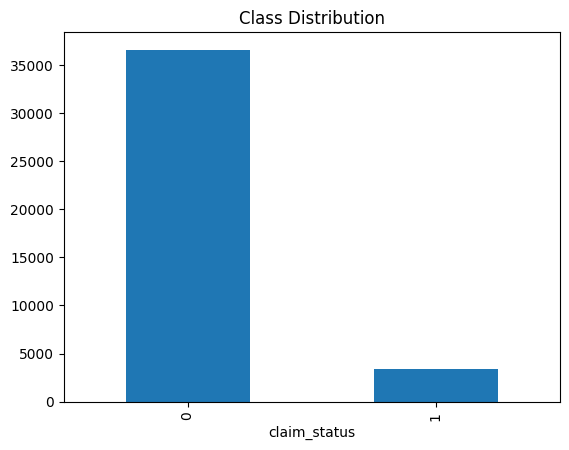

In [22]:
data['claim_status'].value_counts().plot(kind='bar', title='Class Distribution')
plt.show()
#y_balanced.value_counts().plot(kind="bar",title='After SMOTE')
#plt.show()

array([[<Axes: title={'center': 'subscription_length'}>,
        <Axes: title={'center': 'vehicle_age'}>,
        <Axes: title={'center': 'region_code'}>,
        <Axes: title={'center': 'segment'}>,
        <Axes: title={'center': 'model'}>],
       [<Axes: title={'center': 'fuel_type'}>,
        <Axes: title={'center': 'max_torque'}>,
        <Axes: title={'center': 'max_power'}>,
        <Axes: title={'center': 'airbags'}>,
        <Axes: title={'center': 'is_adjustable_steering'}>],
       [<Axes: title={'center': 'is_tpms'}>,
        <Axes: title={'center': 'is_parking_sensors'}>,
        <Axes: title={'center': 'is_parking_camera'}>,
        <Axes: title={'center': 'rear_brakes_type'}>,
        <Axes: title={'center': 'displacement'}>],
       [<Axes: title={'center': 'cylinder'}>,
        <Axes: title={'center': 'transmission_type'}>,
        <Axes: title={'center': 'turning_radius'}>,
        <Axes: title={'center': 'gross_weight'}>,
        <Axes: title={'center': 'is_brake_as

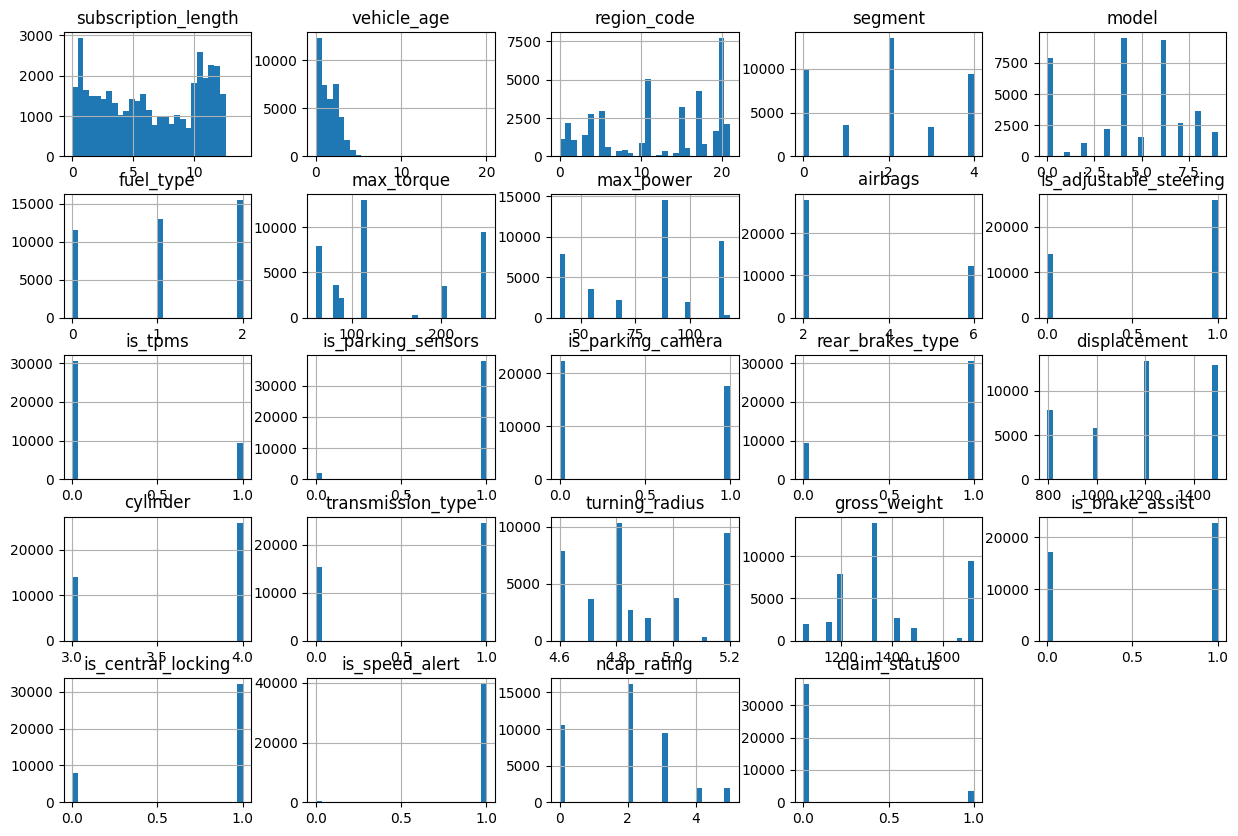

In [174]:
data.hist(bins=30, figsize=(15, 10))


In [175]:
data.columns

Index(['subscription_length', 'vehicle_age', 'region_code', 'segment', 'model',
       'fuel_type', 'max_torque', 'max_power', 'airbags',
       'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'rear_brakes_type', 'displacement', 'cylinder',
       'transmission_type', 'turning_radius', 'gross_weight',
       'is_brake_assist', 'is_central_locking', 'is_speed_alert',
       'ncap_rating', 'claim_status'],
      dtype='object')